In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread
from math import sqrt

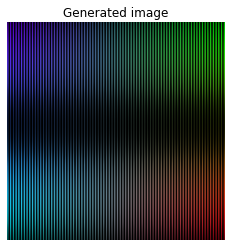

In [17]:
# import pandas as pd

def generate_fabric_pattern_image(width, height, colors):
    pattern_image = np.zeros((height, width, 3), dtype=np.uint8)
    # Define colors at certain points
    color1 = colors[0]
    color2 = colors[1]
    color3 = colors[2]
    color4 = colors[3]

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            # Interpolate colors based on position
            r = int((color1[0] * (height) * (width - x) + color2[0] * (height - y) * x + color3[0] * y * x + color4[0] * y * ( x)) / (width * height))
            g = int((color1[1] * (height - y) * (width - x) + color2[1] * (height - y) * x + color3[1] * y * x + color4[1] * y * (width - x)) / (width * height))
            b = int((color1[2] * (height - y) * (width - x) + color2[2] * (height - y) * x + color3[2] * y * x + color4[2] * y * (width - x)) / (width * height))

            # Add lines to simulate cloth strands
            line_intensity =  np.sin(x ) + 0.5 * np.sin(y / 50)
            line_intensity = np.clip(line_intensity, 0, 1)  # Ensure intensity is within valid range
            r = int(r * line_intensity)
            g = int(g * line_intensity)
            b = int(b * line_intensity)
            # Ensure color values are within the valid range (0-255)
            r = max(0, min(255, r))
            g = max(0, min(255, g))
            b = max(0, min(255, b))

            pattern_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return pattern_image

# Generate gradient image with multiple colors
width, height = 500, 500
colors = [(255, 0, 110), (0, 255, 0), (0, 0, 255), (25, 255, 0)] 
pattern_image = generate_fabric_pattern_image(width, height, colors)

# Display the generated image
plt.axis('off')
plt.title('Generated image')
plt.imshow(pattern_image)


# pd.Series(pattern_image.flatten()).plot(kind='hist',bins=10,title="new hist",color='black')
# plt.show()


Text(0.5, 1.0, 'Only Blue from og image')

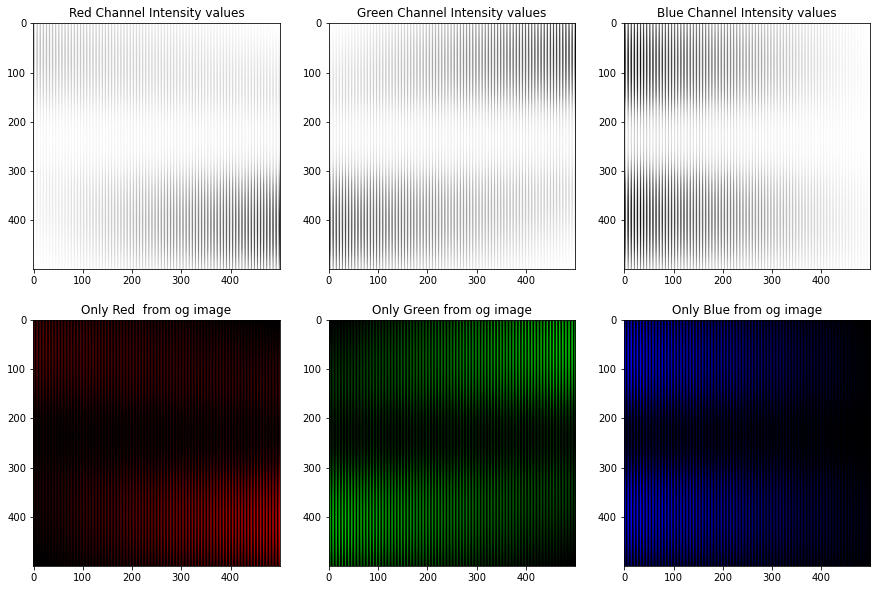

In [28]:
# Separate channels
red_channel = pattern_image[:, :, 0]  
green_channel = pattern_image[:, :, 1]
blue_channel = pattern_image[:, :, 2]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0,0].imshow(red_channel,cmap='Greys')
axs[0,0].set_title('Red Channel Intensity values')
axs[0,1].imshow(green_channel,cmap='Greys')
axs[0,1].set_title('Green Channel Intensity values')
axs[0,2].imshow(blue_channel,cmap='Greys')
axs[0,2].set_title('Blue Channel Intensity values')

pattern_image_redcolored=np.zeros((pattern_image.shape[0],pattern_image.shape[1],3),dtype=int)
pattern_image_greencolored=np.zeros((pattern_image.shape[0],pattern_image.shape[1],3),dtype=int)
pattern_image_bluecolored=np.zeros((pattern_image.shape[0],pattern_image.shape[1],3),dtype=int)

pattern_image_redcolored[:,:,0]=red_channel
pattern_image_greencolored[:,:,1]=green_channel
pattern_image_bluecolored[:,:,2]=blue_channel

axs[1,0].imshow(pattern_image_redcolored)
axs[1,0].set_title('Only Red  from og image')
axs[1,1].imshow(pattern_image_greencolored)
axs[1,1].set_title('Only Green from og image')
axs[1,2].imshow(pattern_image_bluecolored)
axs[1,2].set_title('Only Blue from og image')

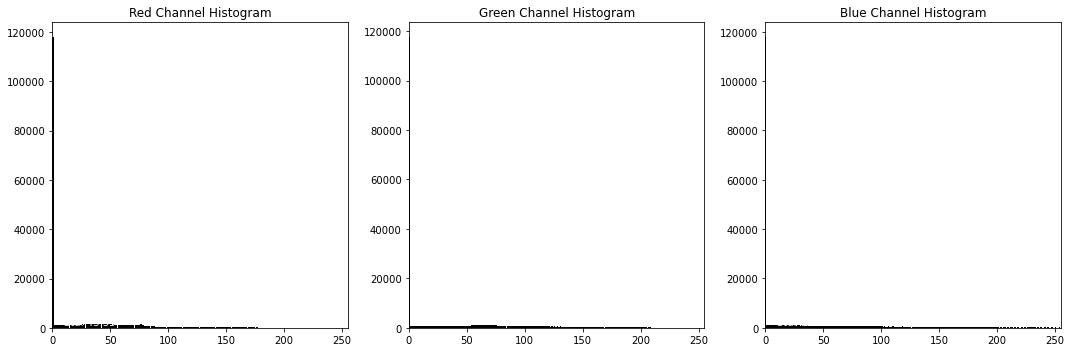

In [30]:
# Plot the histograms using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

channels = [(red_channel, 'Red Channel'), (green_channel, 'Green Channel'), (blue_channel, 'Blue Channel')]

for i, (channel, title) in enumerate(channels):
    # Plot the histogram
    axes[i].hist(channel.ravel(), bins=256, color='black')
    axes[i].set_title(title + ' Histogram')
    axes[i].set_xlim([0, 255])

    

plt.tight_layout()
plt.show()

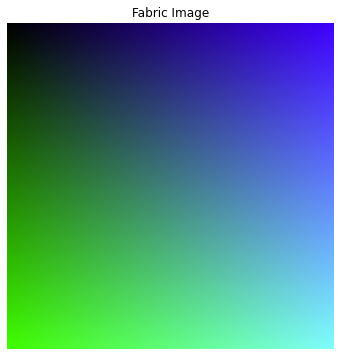

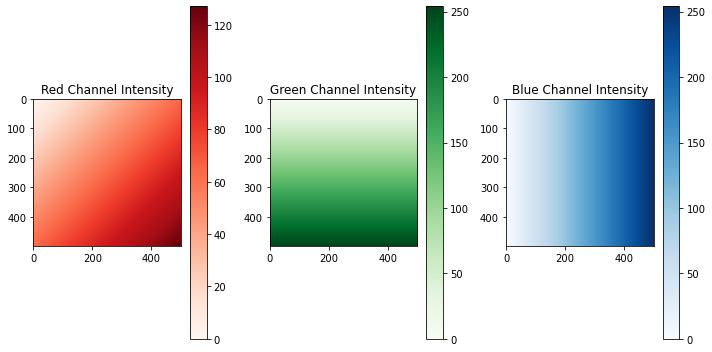

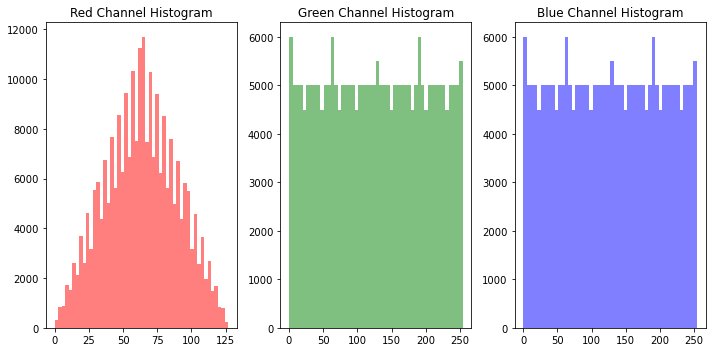

Mean of the whole image: 105.62533333333333
Standard deviation of the whole image: 68.78379536554294


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_fabric_image(width, height):
    fabric_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Define color transitions
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow

    # Generate smooth gradients for each color channel
    for y in range(height):
        for x in range(width):
            r = int(255 * x / width)  # Red component changes smoothly with x
            g = int(255 * y / height)  # Green component changes smoothly with y
            b = int(128 * (x + y) / (width + height))  # Blue component changes smoothly with both x and y

            fabric_image[y, x] = (b, g, r)  # Note: OpenCV uses BGR color format

    return fabric_image

# Generate fabric image
width, height = 500, 500
fabric_image = generate_fabric_image(width, height)

# Plot fabric image
plt.figure(figsize=(6, 6))
plt.imshow(fabric_image)
plt.axis('off')
plt.title('Fabric Image')
plt.show()

# Separate RGB channels
r_channel = fabric_image[:, :, 0]
g_channel = fabric_image[:, :, 1]
b_channel = fabric_image[:, :, 2]


# Plot intensity values of RGB channels on different subplots in one figure
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(r_channel, cmap='Reds')
plt.title('Red Channel Intensity')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(g_channel, cmap='Greens')
plt.title('Green Channel Intensity')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(b_channel, cmap='Blues')
plt.title('Blue Channel Intensity')
plt.colorbar()

plt.tight_layout()
plt.show()

# Plot histograms of each color channel on three subplots in another figure
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(r_channel.flatten(), bins=50, color='red', alpha=0.5)
plt.title('Red Channel Histogram')

plt.subplot(1, 3, 2)
plt.hist(g_channel.flatten(), bins=50, color='green', alpha=0.5)
plt.title('Green Channel Histogram')

plt.subplot(1, 3, 3)
plt.hist(b_channel.flatten(), bins=50, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')

plt.tight_layout()
plt.show()




In [31]:
# Calculate mean and standard deviation of the whole image
mean_value = np.mean(pattern_image)
std_deviation = np.std(pattern_image)
print(f"Mean of the whole image: {mean_value}")
print(f"Standard deviation of the whole image: {std_deviation}")

Mean of the whole image: 40.40910933333333
Standard deviation of the whole image: 56.35595637451922
